In [1]:
# 220913
# 사이킷런
# - 각각의 모델이 무엇인지 알고, 각각의 하이퍼 파라미터만 건드려주면 되는 것
# - 스코어 차이는 전처리 과정에서 차이가 나는 것
# - 데이터 수집과 전처리가 매우 중요 (특히 전처리)

# 지도 vs 비지도
# - 지도 : 분류 vs 회귀
# - 오버피팅 낮으면서도, 새로운 데이터의 스코어가 좋은

# 1. 스케일링, 모델, 전처리 방법
# 2. 다른 사람들의 전처리 과정을 보고, 따라하든 참고해보도록
# - 많이 다뤄봐야 한다

# Q. 범주형 -> 수치형 -> 스케일링 ?
# - 수치형 -> 원핫인코딩 or 희소행렬 (서칭할 것)
# - 수치형 -> 범주형

In [23]:
import pandas as pd
import numpy as np

In [8]:
from urllib.request import Request, urlopen, urlretrieve
URL_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
URL_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names'
FILE_f = 'mpg_data'
FILE_n = 'mpg_names'

In [9]:
ret = urlretrieve(URL_file, FILE_f)

In [10]:
ret2 = urlretrieve(URL_names, FILE_n)

In [11]:
# re(정규표현식) => \s
df=pd.read_csv(URL_file, sep='\s+', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
# 컬럼명 변경
df.rename(columns={0:'mpg', 1:'cylinders', 2:'displacement',
                   3:'horsepower', 4:'weight', 5:'acceleration',
                   6:'model year', 7:'origin', 8:'car name'}, inplace=True)

In [ ]:
# 우선적으로 필요없는 피처 제거
# i) 직관적으로 판단 - 차이름
# ii) 상관관계 판단 (상관계수, 시각화)

In [16]:
# 차이름 피처 제거
df.drop('car name', axis = 1, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [17]:
# 상관관계 파악
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [18]:
# 결측치 있는지 체크 (하나라도 있으면 True, 없으면 False)
# - but, 공백이나 '?'같은 문자는 잡아내지 못함
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [19]:
# 빈공백을 잡아내는 것
# df.eq('').any()
def is_emptystring(x):
    return x.eq(' ').any()
 
df.apply(lambda x:is_emptystring(x))

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [20]:
# 특정 문자 잡아내기
df.eq('?').any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [94]:
# '?'가 들어있음을 확인 <=> unique()로도 확인
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [21]:
# NaN 값 포함 여부를 Boolean 타입의 값으로 반환
df.isna()
df.isnull()

# 결측치 갯수
# 각 column 별로 몇개의 결측치가 있는지
df.isna().sum()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [24]:
# isin(): 해당 데이터의 존재여부를 묻는 함수라서 내가 찾고자 하는 데이터의 존재여부를 물을 수 있습니다
# 주의 : isin()은 파라미터 값에 항상 리스트를 넣어야 작동
df.isin([np.nan,np.inf])
df.isin([np.nan,np.inf]).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [25]:
# 컬럼 : object -> float6
# '?'가 포함되어 있어서 안됨 => 결측치로써 대체해주어야
# df = df.replace('?', np.nan)
# 여기서는 '?'를 0으로 바꿔줌
import numpy as np
df = df.replace('?', 0)

# 해당 컬럼 : object -> float64
df['horsepower'] = pd.to_numeric(df['horsepower'])
# df['horsepower'] = df['horsepower'].astype(int)

In [26]:
# 0으로 바꾼 결측치를 평균치로 대체
dfMean = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].replace(0, dfMean)

In [27]:
df['horsepower'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 102.89447236, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [28]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
# 형태 확인해주기
- continuous (연속형), multi-valued discrete (정수형?), string(문자열)
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [145]:
# 데이터 수집 - 데이터 전처리 (결측치-이상치-...)

In [29]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [190]:
df['mpg'].dtypes

dtype('float64')

In [30]:
# 해당 컬럼들 unique()값을 확인하여,
# 혹시나 수치형으로 나타난 범주 데이터 확인 (확실한 컬럼 제외 가능)
colnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']
for n in colnames:
    print('{} : {}\n'.format(n, df[n].dtypes), df[n].unique(),"\n")
    
# 해당 결과로 수치형으로 나타난 범주형 피처가
# - 'model year'와 'origin'이라는 것을 알 수 있음


mpg : float64
 [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ] 

cylinders : int64
 [8 4 6 3 5] 

displacement : float64
 [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  

판다스 - get_dummies
사이킷런 - one-hot 인코더?

cut - bins 서칭 - label // 홀짝?


In [31]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [193]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [46]:
# orgin 피처가 수치로 나타낸 범주형으로 판단
df['origin'] = df['origin'].astype(object)
df = pd.get_dummies(df)

In [47]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [217]:
# 'model year'을 홀수나 짝수로 묶어주려고 했으나 아직 수행은 안함
# - cut, bins 활용

In [48]:
# 데이터 분리
X = df.drop('mpg', axis=1)
y = df['mpg']
print('X.shape: {},  y.shape: {}'.format(X.shape, y.shape))

X.shape: (398, 9),  y.shape: (398,)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# , random_state =10

In [66]:
# 스케일링
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

In [67]:
import platform
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# 글씨체
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 그래프 음수 가능
plt.rcParams['axes.unicode_minus'] = False

In [68]:
import warnings
warnings.filterwarnings(action='ignore')   # 경고무시

# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
from sklearn.utils import all_estimators
models = all_estimators(type_filter = 'regressor')

# 각 모델들 훈련시키고 정확도 추출
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(X_train, y_train)
        # 평가
        result = md.score(X_test, y_test)
    
        scores.append((name, np.round(result,3)))
    except:
        pass

In [69]:
scores

# RandomForestRegressor', 0.895
# 'GradientBoostingRegressor', 0.882
#'HistGradientBoostingRegressor', 0.913

[('ARDRegression', 0.684),
 ('AdaBoostRegressor', 0.829),
 ('BaggingRegressor', 0.87),
 ('BayesianRidge', 0.784),
 ('CCA', 0.756),
 ('DecisionTreeRegressor', 0.671),
 ('DummyRegressor', -0.024),
 ('ElasticNet', 0.781),
 ('ElasticNetCV', 0.762),
 ('ExtraTreeRegressor', 0.745),
 ('ExtraTreesRegressor', 0.877),
 ('GammaRegressor', -0.022),
 ('GaussianProcessRegressor', -9.793),
 ('GradientBoostingRegressor', 0.868),
 ('HistGradientBoostingRegressor', 0.861),
 ('HuberRegressor', 0.802),
 ('KNeighborsRegressor', 0.725),
 ('KernelRidge', 0.791),
 ('Lars', 0.781),
 ('LarsCV', 0.78),
 ('Lasso', 0.783),
 ('LassoCV', 0.779),
 ('LassoLars', -0.024),
 ('LassoLarsCV', 0.784),
 ('LassoLarsIC', 0.781),
 ('LinearRegression', 0.781),
 ('LinearSVR', 0.481),
 ('MLPRegressor', 0.749),
 ('NuSVR', 0.74),
 ('OrthogonalMatchingPursuit', 0.717),
 ('OrthogonalMatchingPursuitCV', 0.781),
 ('PLSCanonical', -1.483),
 ('PLSRegression', 0.758),
 ('PassiveAggressiveRegressor', -0.077),
 ('PoissonRegressor', -0.023),


In [70]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10,5))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center', color='violet')
    plt.yticks(np.arange(n_features), feature, fontsize=15)
    plt.xlabel('특성 중요도', fontsize=15)
    plt.ylabel('특성', fontsize=15)
    plt.ylim(-1, n_features)
    plt.show()

### [ 랜덤포레스트 ]

In [71]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
regF = RandomForestRegressor(max_depth=5, max_features=0.7, max_samples=0.9,
                      n_estimators=50, oob_score=True)
regF = regF.fit(X_train, y_train)
regF

RandomForestRegressor(max_depth=5, max_features=0.7, max_samples=0.9,
                      n_estimators=50, oob_score=True)

In [72]:
regF.fit(X_train_scaled, y_train)
print("훈  련 세트 정확도 : {:.3f}".format(regF.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(regF.score(X_test_scaled, y_test)))

훈  련 세트 정확도 : 0.941
테스트 세트 정확도 : 0.864


In [ ]:
훈  련 세트 정확도 : 0.944
테스트 세트 정확도 : 0.836

### [ 그래디언트부스팅 ]

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
regG = GradientBoostingRegressor(alpha=0.1, learning_rate=0.03, max_depth=4, subsample=0.9)
regG.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.03, max_depth=4,
                          subsample=0.9)

In [74]:
regG.fit(X_train_scaled, y_train)
print("훈  련 세트 정확도 : {:.3f}".format(regG.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(regG.score(X_test_scaled, y_test)))

훈  련 세트 정확도 : 0.962
테스트 세트 정확도 : 0.859


In [75]:
훈  련 세트 정확도 : 0.961
테스트 세트 정확도 : 0.863

SyntaxError: invalid syntax (3250544538.py, line 1)

In [76]:
pred = regG.predict(X_test)
pred

array([19.35281638, 19.35281638, 19.35281638, 19.46098428, 19.35281638,
       19.35281638, 19.46098428, 19.46098428, 19.46098428, 19.46098428,
       19.35281638, 19.35281638, 19.46098428, 19.46098428, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.46098428, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.46098428, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.46098428, 19.35281638, 19.35281638, 19.35281638, 19.46098428,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.46098428, 19.46098428,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.35281638, 19.35281638,
       19.35281638, 19.35281638, 19.35281638, 19.46098428, 19.35

### [ 히스트그래디언팅 ]

In [77]:
from sklearn.ensemble import HistGradientBoostingRegressor
regH = HistGradientBoostingRegressor(loss='poisson', learning_rate=0.35, max_depth=8, max_iter=500)
regH.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor(learning_rate=0.35, loss='poisson', max_depth=8,
                              max_iter=500)

In [78]:
regH.fit(X_train_scaled, y_train)
print("훈  련 세트 정확도 : {:.3f}".format(regH.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(regH.score(X_test_scaled, y_test)))

훈  련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.832


In [79]:
pred = regH.predict(X_test)
pred

array([16.22150464, 16.22150464, 16.22461981, 16.76403169, 16.22461981,
       16.22461981, 16.76403169, 16.76403169, 16.76403169, 16.76403169,
       16.22150464, 16.22461981, 16.76403169, 16.76403169, 16.22461981,
       16.22461981, 16.22461981, 16.22461981, 16.22461981, 16.22150464,
       16.22461981, 16.76403169, 16.22461981, 16.22461981, 16.22461981,
       16.22150464, 16.22150464, 16.22461981, 16.22461981, 16.22150464,
       16.76403169, 16.22461981, 16.22461981, 16.22461981, 16.22461981,
       16.76403169, 16.22461981, 16.22461981, 16.22150464, 16.76403169,
       16.22461981, 16.22461981, 16.22461981, 16.22150464, 16.22461981,
       16.22461981, 16.22461981, 16.22461981, 16.22461981, 16.22461981,
       16.22150464, 16.22150464, 16.22461981, 16.76403169, 16.76403169,
       16.22150464, 16.22150464, 16.22461981, 16.22461981, 16.22461981,
       16.22461981, 16.22150464, 16.22461981, 16.22461981, 16.22461981,
       16.22461981, 16.22461981, 16.22461981, 16.76403169, 16.22

In [57]:
# 특성 중요도
print('특성 중요도:\n', regF.feature_importances_)

특성 중요도:
 [0.26090669 0.23429054 0.14157389 0.21351952 0.02360532 0.12063917
 0.00077911 0.00156187 0.00312389]


In [58]:
feature = X.columns

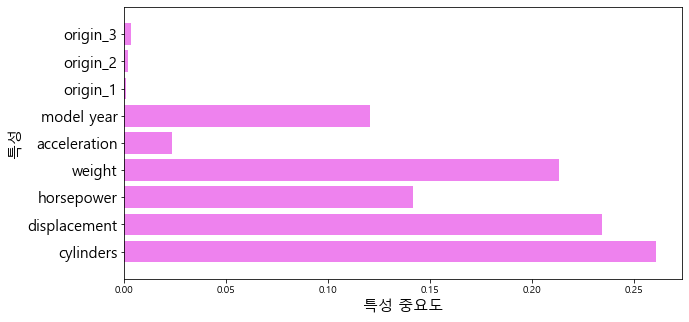

In [59]:
plot_feature_importances_cancer(regF)

In [60]:
regF.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(regF.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.839


In [61]:
# 학습된 DecisionTreeClassifier로 테스트 데이터를 예측한 후 결과값을 pred에 저장
pred = regF.predict(X_test) 
pred_df = pd.DataFrame({ 'test값':y_test, 'predict값':pred })
pred_df

,test값,predict값
221,17.5,17.740896
173,24.0,17.740896
341,23.5,17.740896
19,26.0,17.740896
105,13.0,17.740896
...,...,...
217,30.0,17.740896
216,31.5,17.740896
117,29.0,17.740896
56,26.0,17.740896


In [ ]:
DecisionTreeClassifier 를 이용한 학습 및 정확도 평가

#DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(randome_state=10) 

#학습 수행
df_clf.fit(X_train, Y_train) 

# 학습된 DecisionTreeClassifier로 테스트 데이터를 예측한 후 결과값을 pred에 저장
pred = df_clf.predict(X_test) 

#예측된 데이터와 Y_test 비교
accuracy_score(y_test,pred)

In [ ]:
# 연비 예측

# 정확도/스코어, 오차율
# all_estimators()
# 그리드서치() 돌려보기 GridSearchGV

In [ ]:
# 필요없는 피처 제거
# - 자동차 이름 제거
# 

In [166]:
# 피처들이 수치형들이 많네
# -> 각 관계를 산점도로 살펴보든지 해보자

#

In [ ]:
# 전처리 남은 것 -> model year을 묶어서 홀,짝
# - 더 생각해보기 (특성 공학)

# 그리드서치
# 